In [2]:
%pylab inline
from IPython.display import HTML
%matplotlib inline

import os
import sys
from io import *
import scipy
import seaborn as sns

from pandas import read_csv
import matplotlib.pyplot as plt

cwd = os.getcwd()

# To use whole dataset uncomment this lines
#MedData = cwd +"/medicare_data/Medicare-Physician-and-Other-Supplier-PUF-CY2012.csv"
#data = read_csv(MedData, sep="\t")
#g_IL=data[data["nppes_provider_state"]=="IL"] 
#f_IL=g_IL[g_IL["provider_type"]=="Pathology"]

DATA_PATH = "/home/pmlf/Documents/data/"

IL_data = DATA_PATH +"medicare_data/Medicare_Data_IL_2012.csv"
f_IL = read_csv(IL_data)

Populating the interactive namespace from numpy and matplotlib


In [3]:
f_IL.describe()

,Unnamed: 0,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,stdev_Medicare_allowed_amt,average_submitted_chrg_amt,stdev_submitted_chrg_amt,average_Medicare_payment_amt,stdev_Medicare_payment_amt
count,3.838360e+05,3.838360e+05,3.838360e+05,3.838360e+05,383836.000000,383836.000000,383836.000000,383836.000000,383836.000000,383836.000000,383836.000000,383836.000000
mean,4.590852e+06,1.500959e+09,5.419772e+08,2.342250e+02,87.829404,148.955275,98.711634,6.523625,342.210917,23.792301,76.799866,12.313532
std,2.631574e+06,2.867022e+08,1.901098e+08,4.080380e+03,602.548455,1111.001193,190.735353,36.948683,929.079600,168.214616,150.965856,33.020354
min,8.000000e+00,1.003000e+09,6.170000e+02,1.100000e+01,11.000000,11.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2.309026e+06,1.255322e+09,6.010138e+08,2.100000e+01,18.000000,21.000000,24.330000,0.000000,62.000000,0.000000,19.526299,0.103980
50%,4.565712e+06,1.497854e+09,6.052138e+08,4.700000e+01,33.000000,44.000000,64.374416,0.000000,141.996711,0.000000,47.459112,4.960771
75%,6.876783e+06,1.750322e+09,6.110423e+08,1.310000e+02,79.000000,118.000000,111.890000,0.914877,281.000000,3.957047,85.794524,15.738189
max,9.153107e+06,1.992998e+09,6.313661e+08,1.092721e+06,170152.000000,279254.000000,32799.949219,10326.988384,98000.000000,27576.714201,25545.394688,8950.803036


In [4]:
f_IL.head(5)

,Unnamed: 0,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,...,hcpcs_description,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,stdev_Medicare_allowed_amt,average_submitted_chrg_amt,stdev_submitted_chrg_amt,average_Medicare_payment_amt,stdev_Medicare_payment_amt
0,8,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Pathology examination of tissue using a micros...,226.0,207.0,209.0,11.640000,0.000000,115.0,0.0,8.980442,1.720341
1,9,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Pathology examination of tissue using a micros...,6070.0,3624.0,4416.0,37.729960,0.001257,170.0,0.0,28.984504,5.626832
2,10,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Preparation of tissue for examination by remov...,13.0,13.0,13.0,12.700000,0.000000,39.0,0.0,7.815385,4.280662
3,11,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Special stained specimen slides to identify or...,330.0,231.0,238.0,27.149576,0.005433,88.0,0.0,21.391364,2.646612
4,12,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Special stained specimen slides to examine tis...,51.0,46.0,48.0,12.340000,0.000000,68.0,0.0,9.676471,1.368460


In [5]:
#QUIZ

# Uncomment these lines to use all dataset
#g_CA=data[data["nppes_provider_state"]=="CA"] 
#f_CA=g_CA[g_CA["provider_type"]=="Pathology"]

CA_data = DATA_PATH +"medicare_data/Medicare_Data_CA_2012.csv"
f_CA = read_csv(CA_data)

In [6]:
# THIS IS FOR QUIZ
f_CA.describe()

,Unnamed: 0,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,stdev_Medicare_allowed_amt,average_submitted_chrg_amt,stdev_submitted_chrg_amt,average_Medicare_payment_amt,stdev_Medicare_payment_amt
count,7.206740e+05,7.206740e+05,7.206740e+05,7.206740e+05,720674.000000,720674.000000,720674.000000,720674.000000,720674.000000,720674.000000,720674.000000,720674.000000
mean,4.585898e+06,1.500344e+09,8.346929e+08,2.812427e+02,102.331233,179.379574,111.293877,7.809624,331.248677,25.237833,87.010924,13.320523
std,2.640442e+06,2.877989e+08,2.816170e+08,6.436580e+03,1362.434098,2525.185671,251.640149,42.255461,912.444946,179.022768,200.377147,36.112845
min,8.200000e+01,1.003001e+09,6.851000e+03,7.700000e+00,11.000000,11.000000,0.002338,0.000000,0.002338,0.000000,0.000000,0.000000
25%,2.292733e+06,1.245566e+09,9.080754e+08,2.200000e+01,18.000000,21.000000,25.680000,0.000000,54.000000,0.000000,20.797109,0.001467
50%,4.604860e+06,1.508814e+09,9.255368e+08,4.700000e+01,33.000000,44.000000,68.990000,0.000000,131.000000,0.000000,51.294046,4.807574
75%,6.864378e+06,1.740512e+09,9.430322e+08,1.330000e+02,79.000000,119.000000,122.637770,0.960892,280.268969,3.711537,93.379180,16.663135
max,9.153143e+06,1.992998e+09,9.924343e+08,3.707234e+06,256034.000000,508209.000000,36489.655263,5643.068806,73526.000000,19444.525000,29191.722895,4702.487861


In [7]:
# THIS IS FOR QUIZ
f_CA.head(5)

,Unnamed: 0,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,...,hcpcs_description,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,stdev_Medicare_allowed_amt,average_submitted_chrg_amt,stdev_submitted_chrg_amt,average_Medicare_payment_amt,stdev_Medicare_payment_amt
0,82,1003000712,MALLORY,SHEILA,O,N. P.,F,I,1867 E FIR AVE STE 104,NaN,...,Ultrasound guidance for accessing into blood v...,14.0,14.0,14.0,12.820000,0.000000,57.0,0.0,10.260000,0.000000
1,108,1003001017,NICHOLS,LAWRENCE,M,M.D,M,I,5471 LA PALMA AVE,STE. 202,...,Destruction of skin growth,110.0,62.0,110.0,91.570000,6.172714,100.0,0.0,66.659818,20.146418
2,109,1003001017,NICHOLS,LAWRENCE,M,M.D,M,I,5471 LA PALMA AVE,STE. 202,...,Destruction of multiple skin growths,262.0,46.0,71.0,8.030000,0.000000,10.0,0.0,6.042405,2.879763
3,110,1003001017,NICHOLS,LAWRENCE,M,M.D,M,I,5471 LA PALMA AVE,STE. 202,...,Destruction of multiple skin growths,430.0,158.0,430.0,191.490000,0.000000,220.0,0.0,146.658651,24.311615
4,111,1003001017,NICHOLS,LAWRENCE,M,M.D,M,I,5471 LA PALMA AVE,STE. 202,...,Skin application of tar and ultraviolet B or p...,121.0,31.0,121.0,86.185455,7.060642,95.0,0.0,68.319752,6.533262


In [8]:
len(f_IL.columns)

28

In [9]:
for c in f_IL.columns : print(c)

Unnamed: 0
npi
nppes_provider_last_org_name
nppes_provider_first_name
nppes_provider_mi
nppes_credentials
nppes_provider_gender
nppes_entity_code
nppes_provider_street1
nppes_provider_street2
nppes_provider_city
nppes_provider_zip
nppes_provider_state
nppes_provider_country
provider_type
medicare_participation_indicator
place_of_service
hcpcs_code
hcpcs_description
line_srvc_cnt
bene_unique_cnt
bene_day_srvc_cnt
average_Medicare_allowed_amt
stdev_Medicare_allowed_amt
average_submitted_chrg_amt
stdev_submitted_chrg_amt
average_Medicare_payment_amt
stdev_Medicare_payment_amt


The variables for the problem we are studying are the ones refering charges in their name.

In [10]:
#pal1 = dict(M="#4682B4", F="#CD5C5C")
print(len(f_IL.provider_type.unique()))
print(len(f_IL.nppes_provider_city.unique()))
print(len(f_IL.hcpcs_description.unique()))

82
772
2986


In [11]:
f0 = f_IL.average_submitted_chrg_amt.values
f1 = f_IL.average_Medicare_payment_amt.values
f2 = f_IL.average_Medicare_allowed_amt.values

[None, None]

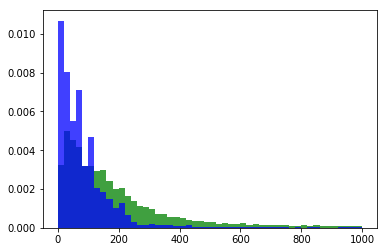

In [12]:
n0, bins0, patches0=plt.hist(f0,50,normed=1, range=(0,1000),
                             histtype='stepfilled')
n2, bins2, patches2=plt.hist(f2,50,normed=1, range=(0,1000),
                             histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)
plt.setp(patches2, 'facecolor', 'b', 'alpha', 0.75)

[None, None]

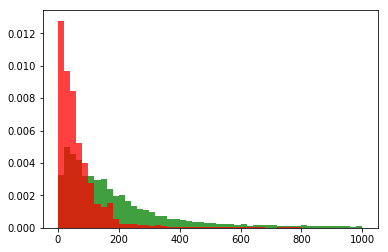

In [13]:
n0, bins0, patches0=plt.hist(f0,50,normed=1, log=0,range=(0,1000),
                             histtype='stepfilled')
n1, bins1, patches1=plt.hist(f1,50,normed=1, log=0,range=(0,1000),
                             histtype='stepfilled')
plt.setp(patches1, 'facecolor', 'r', 'alpha', 0.75)
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)

In [14]:
# QUIZ

g0 = f_CA.average_submitted_chrg_amt.values
g1 = f_CA.average_Medicare_payment_amt.values
g2 = f_CA.average_Medicare_allowed_amt.values

[None, None]

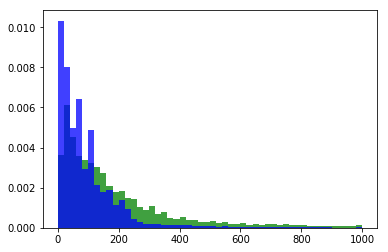

In [15]:
# QUIZ
# Normed 1 forces the integral of the distribution to be one

n0, bins0, patches0=plt.hist(g0,50,normed=1, range=(0,1000),
                             histtype='stepfilled')
n2, bins2, patches2=plt.hist(g2,50,normed=1, range=(0,1000),
                             histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)
plt.setp(patches2, 'facecolor', 'b', 'alpha', 0.75)

[None, None]

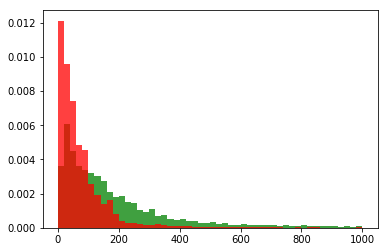

In [16]:
# QUIZ
n0, bins0, patches0=plt.hist(g0,50,normed=1, log=0,range=(0,1000),
                             histtype='stepfilled')
n1, bins1, patches1=plt.hist(g1,50,normed=1, log=0,range=(0,1000),
                             histtype='stepfilled')
plt.setp(patches1, 'facecolor', 'r', 'alpha', 0.75)
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)

**Normalized variables**

[None, None]

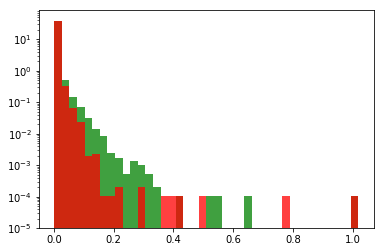

In [17]:
n0, bins0, patches0=plt.hist((f0-f0.min())/(f0.max() - f0.min()),40,
                             normed=1,log=1,range=(0.,1.02),
                             histtype='stepfilled')
n1, bins1, patches1=plt.hist((f1-f1.min())/(f1.max() - f1.min()),40,
                             normed=1,log=1,range=(0,1.02),
                             histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)
plt.setp(patches1, 'facecolor', 'r', 'alpha', 0.75)

[None, None]

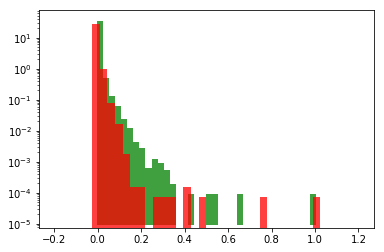

In [18]:
n0, bins0, patches0=plt.hist((f0-f0.min())/(f0.max() - f0.min()),50,
                             normed=1, log=1,range=(-0.2,1.2),
                             histtype='stepfilled')
n1, bins1, patches1=plt.hist((f2-f2.min())/(f2.max() - f2.min()),40,
                             normed=1, log=1,range=(-0.2,1.2),
                             histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)
plt.setp(patches1, 'facecolor', 'r', 'alpha', 0.75)

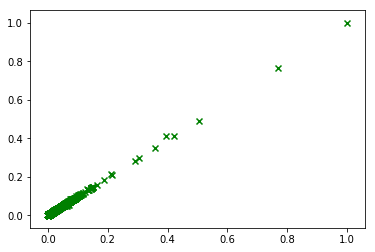

In [19]:
plt.scatter((f1 - f1.min())/(f1.max() - f1.min()),(f2-f2.min())/(f2.max() - f2.min()),
            marker="x",color="g")

Paid amount changes linearly with allowed amounts

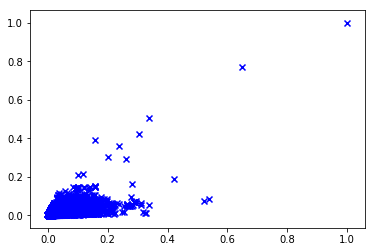

In [20]:
plt.scatter((f0 - f0.min())/(f0.max() - f0.min()),(f1-f1.min())/(f1.max() - f1.min()),
            marker="x",color="b")

In [21]:
from scipy.stats import pearsonr
pearsonr(f1,f2)

(0.9989192805679976, 0.0)

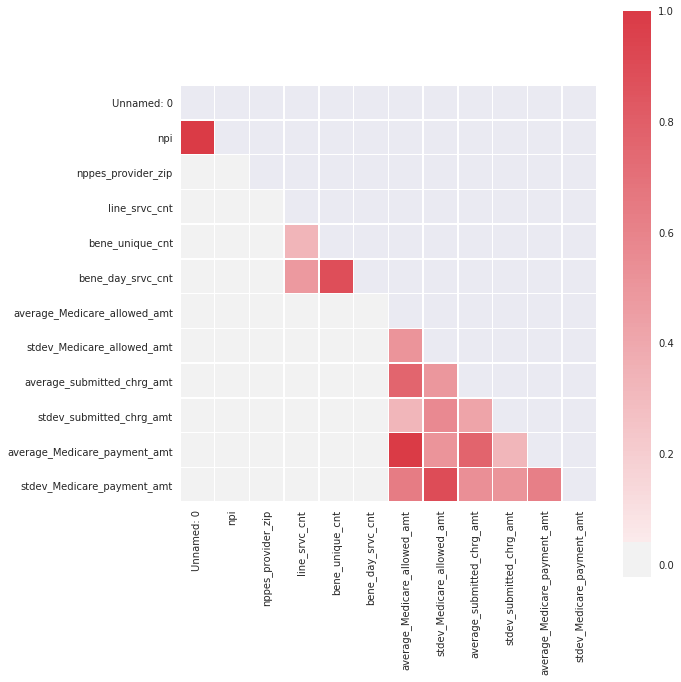

In [22]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))
#sns.corrplot(f_IL, annot=False, sig_stars=True,
#             diag_names=False, ax=ax)

# Compute the correlation matrix
corr = f_IL.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the correlation heatmap
sns.heatmap(corr, mask=mask, ax=ax, center=0, square=True, 
            cmap=cmap, linewidths=.5)

f.tight_layout()

In [23]:
# Quiz
from scipy.stats import pearsonr
pearsonr((f1 - f1.min())/(f1.max() - f1.min()),f2/(f2.max() - f2.min()))

(0.9989192805679968, 0.0)

**Using Kernel Density Estimation**

with derived variable x, based on f0 and f1.

[None, None]

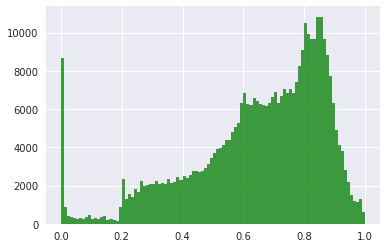

In [24]:
x = abs(f0-f1)/f0
n0, bins0, patches0=plt.hist(x,100,normed=0,range=(0,1),histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)

[None, None]

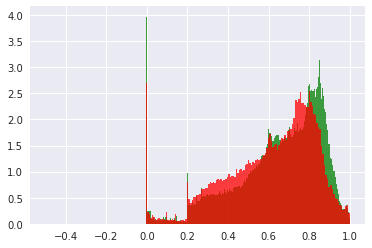

In [25]:
## QUIZ
y = abs(g0-g1)/g0
n1, bins1, patches1=plt.hist(x,200,normed=1,range=(-0.05,1),log=0,histtype='stepfilled')
n2, bins2, patches2=plt.hist(y,200,normed=1,range=(-0.5,1),log=0,histtype='stepfilled')
plt.setp(patches1, 'facecolor', 'g', 'alpha', 0.75)
plt.setp(patches2, 'facecolor', 'r', 'alpha', 0.75)

In [26]:
from scipy import stats
from functools import partial

def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

def getKDE(data, name="", bwfac = 0.2):
    x2=data
    x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
    
    kde = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=bwfac))
    
    fig1 = plt.figure(figsize=(8, 6))
    ax = fig1.add_subplot(111)
    plt.yscale=('log')
    plt.grid(True)
    
    x2h1, x2h2 =np.histogram(x2,bins=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],normed=True)
    
    ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
    ax.plot(x_eval, kde(x_eval), 'g-', label="Scott *"+str(bwfac))
    ax.plot(x2h2[:-1], x2h1, 'r--', label="Actual PDF")
    ax.set_xlim([-0.5,1.5])
    ax.legend(loc=2)
    ax.set_xlabel('x')
    ax.set_ylabel('Density Estimate')
#     plt.savefig(cwd+"/Plots/KDE_"+name+".png")
    return plt


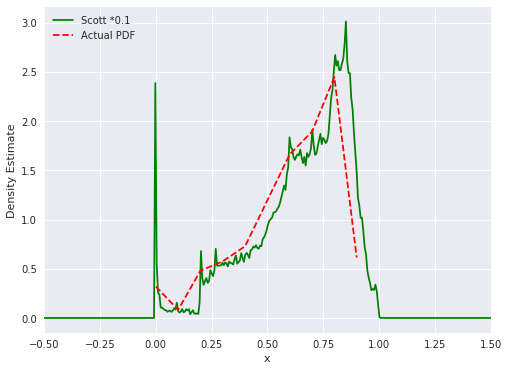

In [27]:
plt.clf()
plt=getKDE(x,"Fractional Diff of Claimed vs Paid",bwfac=0.1)

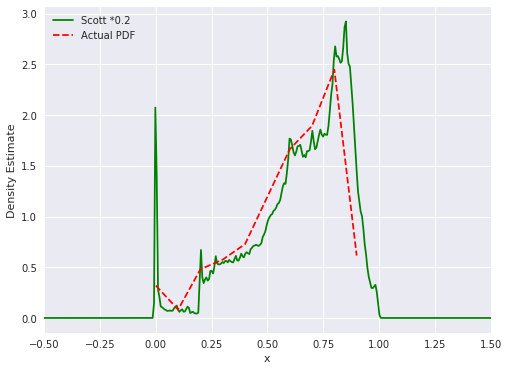

In [57]:
plt.clf()
plt=getKDE(x,"Fractional Diff of Claimed vs Paid",bwfac=0.2)

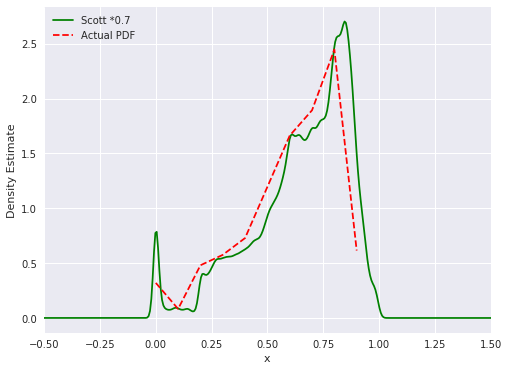

In [58]:
plt.clf()
plt=getKDE(x,"Fractional Diff of Claimed vs Paid",bwfac=0.7)

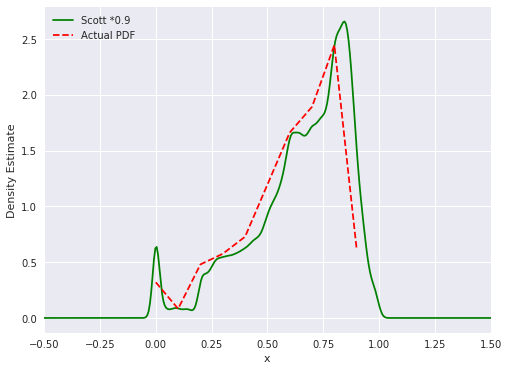

In [59]:
plt.clf()
plt=getKDE(x,"Fractional Diff of Claimed vs Paid",bwfac=0.9)

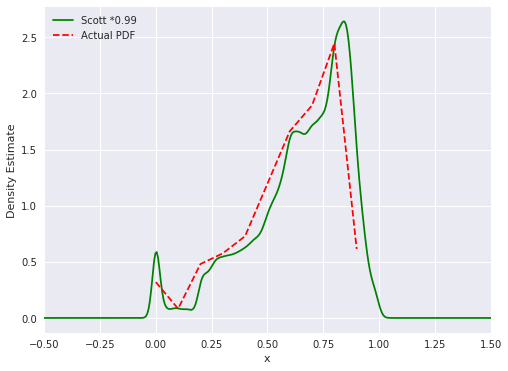

In [60]:
plt.clf()
plt=getKDE(x,"Fractional Diff of Claimed vs Paid",bwfac=0.99)

In [28]:
def getAllKDE(data, name=""):
    """ Used to generate several kde estimates """
    
    x2=data
    x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
    
    kde1 = stats.gaussian_kde(x2)
    kde2 = stats.gaussian_kde(x2, bw_method='silverman')
    kde3 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.2))
    kde4 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.5))
    pdf = stats.norm.pdf
    fig1 = plt.figure(figsize=(12, 10))
    ax = fig1.add_subplot(111)
    
    plt.yscale=('log')
    plt.grid(True)
    x2h1, x2h2 =np.histogram(x2,bins=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],normed=True)
    ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
    ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
    ax.plot(x_eval, kde2(x_eval), 'b-', label="Silverman's Rule")
    ax.plot(x_eval, kde3(x_eval), 'g-', label="Scott * 0.2")
    ax.plot(x_eval, kde4(x_eval), 'c-', label="Scott * 0.9")
    ax.plot(x2h2[:-1], x2h1, 'r--', label="Actual PDF")
    
    
    #ax.set_xlim([x_eval.min(), x_eval.max()])
    ax.set_xlim([-0.5,1.5])
    ax.legend(loc=2)
    ax.set_xlabel('x')
    ax.set_ylabel('Density Estimate')
#     plt.savefig(cwd+"/Plots/KDE_"+name+".png")
    return plt

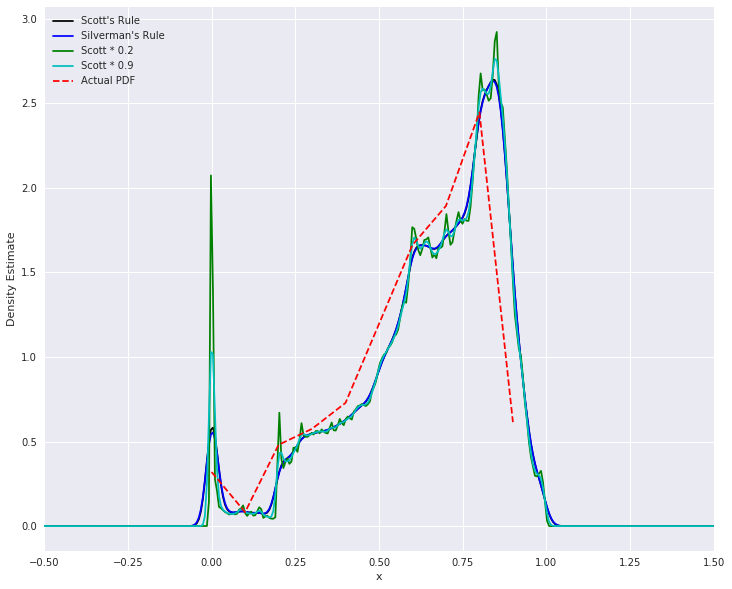

In [29]:
plt.clf()
plt=getAllKDE(x,"Fractional Diff of Claimed vs Paid")

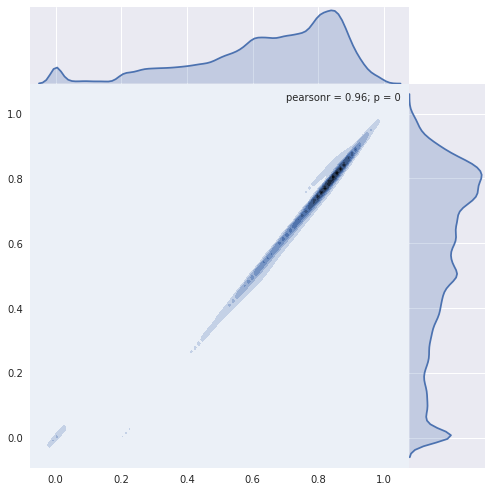

In [30]:
xbar = abs(f0 - f2)/f0
g = sns.jointplot(x, xbar, kind="kde", size=7, space=0)

On each of the axis is seen the one-dimensional pdfs. The joint pdf is seen on the heatmap. 

In [31]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),
                                        inv_covariance_xy),diff_xy[i])))
    return md

In [34]:
md = MahalanobisDist(x,xbar) 

In [35]:
def FindOutliers(x, y, p):
    MD = MahalanobisDist(x, y)
    nx, ny, outliers = [], [], []
    threshold = -2*log(1-p)
    for i in range(len(MD)):
        if MD[i]*MD[i] < threshold:
            nx.append(x[i])
            ny.append(y[i])
            outliers.append(i) # position of removed pair
    return (np.array(nx), np.array(ny), np.array(outliers))

In [36]:
# Using 5-sigma in a normal distribution
Outliers = FindOutliers(x,xbar,0.00000243)

In [40]:
#print Outliers

def PlotOutliers(Outliers):
    print("Total Outliers found :", len(Outliers[2]))
    print("The index of the variables are :", Outliers[2])
    fig2 = plt.figure(figsize=(8, 6))
    ax2 = fig2.add_subplot(111)
    ax2.set_xlim([0.,1.])
    ax2.legend(loc=2)
    ax2.set_xlabel('1 - Allowed Amount/Paid Amount')
    ax2.set_ylabel('1 - Submitted Amount/Paid Amount')
    plt.scatter(Outliers[0],Outliers[1])
    return plt

No handles with labels found to put in legend.


Total Outliers found : 3
The index of the variables are : [230791 273412 348140]


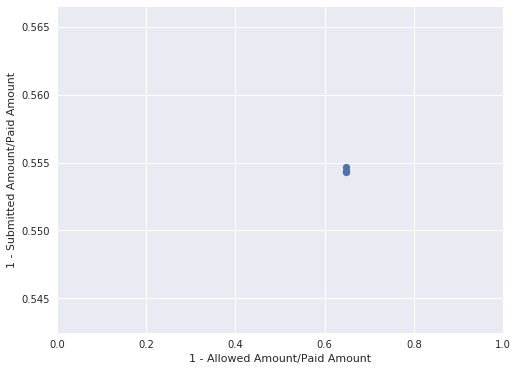

In [41]:
plt.clf()
plt = PlotOutliers(Outliers)

In [43]:
# Quiz 
#Show the indeces using g with y and ybar

ybar = abs(g0-g2)/g0
Outliers = FindOutliers(y,ybar,0.00000243)
print(Outliers)

(array([0.61213082, 0.61236601, 0.61184367, 0.6124432 ]), array([0.51168092, 0.51196361, 0.51156639, 0.51211253]), array([162281, 309078, 373972, 406175]))
